# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [1]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Preparing metadata (setup.py) ... done
  Created wheel for pyinstrument-cext: filename=pyinstrument_cext-0.2.4-cp312-cp312-linux_x86_64.whl size=6480 sha256=e4fd4e28dd8ef5c7bc4581e0aadaef2751abfca836d5e0ad2e2acf1cb6867965
  Stored in directory: /home/sagemaker-user/.cache/pip/wheels/f9/d7/e0/938c359be77dcd8423fe32988bb00b72f5f1410088b07f181b
Successfully built pyinstrument-cext
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.3
    Uninstalling protobuf-5.28.3:
      Successfully uninstalled protobuf-5.28.3


In [1]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
from sagemaker.tuner import (IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner) 
from sagemaker.pytorch import PyTorch
import sagemaker.debugger
from sagemaker.debugger import (Rule, ProfilerRule, rule_configs, DebuggerHookConfig, ProfilerConfig, FrameworkProfile)

/opt/conda/lib/python3.12/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [2]:
#TODO: Fetch and upload the data to AWS S3
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
role = sagemaker.get_execution_role()
# Command to download and unzip data
#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip dogImages.zip

In [3]:
print(f"Default Bucket: {bucket}")
print(f"RoleArn: {role}")

Default Bucket: sagemaker-us-east-1-381491983227
RoleArn: arn:aws:iam::381491983227:role/service-role/AmazonSageMaker-ExecutionRole-20250128T162863


In [9]:
# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2025-04-29 15:21:00--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.193.96, 16.15.0.211, 16.15.0.163, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.193.96|:443... connected.
ERROR: cannot verify s3-us-west-1.amazonaws.com's certificate, issued by ‘CN=Amazon RSA 2048 M01,O=Amazon,C=US’:
  Unable to locally verify the issuer's authority.
To connect to s3-us-west-1.amazonaws.com insecurely, use `--no-check-certificate'.
unzip:  cannot find or open dogImages.zip, dogImages.zip.zip or dogImages.zip.ZIP.


In [10]:
!wget --no-check-certificate https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2025-04-29 15:22:25--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.194.40, 16.15.4.241, 52.219.120.104, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.194.40|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  31.4MB/s    in 52s     

2025-04-29 15:23:18 (20.7 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImage

In [18]:
local_dir = 'dogImages'
prefix = 'udacity-image-classification' 
inputs = sagemaker_session.upload_data(path = local_dir, bucket=bucket, key_prefix= prefix) 
print(f"doimages data uploaded to s3 {inputs} ")


doimages data uploaded to s3 s3://sagemaker-us-east-1-381491983227/udacity-image-classification 


In [16]:
inputs = 's3://sagemaker-us-east-1-381491983227/udacity-image-classification'

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

### Hyperparameter Tuning
It's time to finetune a pretrained model with hyperparameter tuning. The selected parameters are:

##### 1.learning rate: to have a faster convergence
##### 2.batch size: to have an efficient training time
##### 3.epochs: to have an efficient training time

In [27]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameters_range = {"lr": ContinuousParameter(0.0001,0.1), 
                         "batch_size": CategoricalParameter([32,64,128]), 
                         "epochs": IntegerParameter(0,20)}

In [28]:
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss","Regex": "average test loss = ([+-]?[0-9\\.]+)"}]

In [6]:
#PyTorch?

Init signature:
PyTorch(
    entry_point: Union[str, sagemaker.workflow.entities.PipelineVariable, NoneType] = None,
    framework_version: Optional[str] = None,
    py_version: Optional[str] = None,
    source_dir: Union[str, sagemaker.workflow.entities.PipelineVariable, NoneType] = None,
    hyperparameters: Optional[Dict[str, Union[str, sagemaker.workflow.entities.PipelineVariable]]] = None,
    image_uri: Union[str, sagemaker.workflow.entities.PipelineVariable, NoneType] = None,
    distribution: Optional[Dict] = None,
    compiler_config: Optional[sagemaker.pytorch.training_compiler.config.TrainingCompilerConfig] = None,
    training_recipe: Optional[str] = None,
    recipe_overrides: Optional[Dict] = None,
    **kwargs,
)
Docstring:      Handle end-to-end training and deployment of custom PyTorch code.
Init docstring:
This ``Estimator`` executes a PyTorch script in a managed PyTorch execution environment.

The managed PyTorch environment is an Amazon-built Docker container that e

In [29]:
#TODO: Create estimators for your HPs

estimator = PyTorch(entry_point = "hpo.py", 
                    role = role, 
                    py_version = "py36",
                    framework_version = "1.8",
                    instance_count =1,
                    instance_type = "ml.g4dn.xlarge")

tuner = HyperparameterTuner(estimator, 
                            objective_metric_name,
                            hyperparameters_range,
                            metric_definitions, 
                            max_jobs= 4, 
                            max_parallel_jobs= 1, 
                            objective_type= objective_type)

In [30]:
# TODO: Fit your HP Tuner
tuner.fit({"training": inputs}, wait=True) # TODO: Remember to include your data channels

[05/13/25 14:45:02] INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=177335;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=392837;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

[05/13/25 14:45:03] INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=258158;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=790541;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

                    WARNING  No finished training job found associated with this estimator.       ]8;id=448900;file:///opt/conda/lib/python3.12/site-packages/sagemaker/estimator.py\estimator.py]8;;\:]8;id=448741;file:///opt/conda/lib/python3.12/site-packages/sagemaker/estimator.py#1914\1914]8;;\
                             Please make sure this estimator is only used for building workflow                    
                             config                                                                                

                    WARNING  No finished training job found associated with this estimator.       ]8;id=699864;file:///opt/conda/lib/python3.12/site-packages/sagemaker/estimator.py\estimator.py]8;;\:]8;id=749801;file:///opt/conda/lib/python3.12/site-packages/sagemaker/estimator.py#1914\1914]8;;\
                             Please make sure this estimator is only used for building workflow                    
                             config                                                                                

                    INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=948365;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=885566;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

                    INFO     Creating hyperparameter tuning job with name:                          ]8;id=684671;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=664021;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#3383\3383]8;;\
                             pytorch-training-250513-1445                                                          

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................!


In [31]:
# TODO: Get the best estimators and the best HPs

best_estimator =  tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2025-05-13 15:15:10 Starting - Preparing the instances for training
2025-05-13 15:15:10 Downloading - Downloading the training image
2025-05-13 15:15:10 Training - Training image download completed. Training in progress.
2025-05-13 15:15:10 Uploading - Uploading generated training model
2025-05-13 15:15:10 Completed - Resource reused by training job: pytorch-training-250513-1445-002-6dc2c526


{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"128"',
 'epochs': '6',
 'lr': '0.0013960977976329736',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2025-05-13-14-45-02-731"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-381491983227/pytorch-training-2025-05-13-14-45-02-731/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [83]:
best_hyperparameters = {
    "batch_size": int(best_estimator.hyperparameters()["batch_size"].replace('"', "")),
    "epochs": best_estimator.hyperparameters()["epochs"],
    "lr": best_estimator.hyperparameters()["lr"],
}

In [84]:
# TODO: Set up debugging and profiling rules and hooks
rules = [Rule.sagemaker(rule_configs.vanishing_gradient()), 
         Rule.sagemaker(rule_configs.overfit()),
         Rule.sagemaker(rule_configs.overtraining()), 
         Rule.sagemaker(rule_configs.poor_weight_initialization()),
         ProfilerRule.sagemaker(rule_configs.ProfilerReport()),]

profiler_config = ProfilerConfig(system_monitor_interval_millis=500)

debugger_hook_config = DebuggerHookConfig(hook_parameters={"train.save_interval": "100", 
                                                           "eval.save_interval": "10"}) 
         

In [85]:
# TODO: Create and fit an estimator

estimator = PyTorch(entry_point = "train_model.py", 
                    role = role, 
                    py_version = "py36",
                    framework_version = "1.8",
                    instance_count =1,
                    instance_type = "ml.g4dn.xlarge",
                    hyperparameters = best_hyperparameters,
                    rules = rules, 
                    profiler_config=profiler_config,
                    debugger_hook_config = debugger_hook_config
                   )


In [87]:
estimator.fit({"training": inputs}, wait=True) 

[05/14/25 10:04:39] INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=351252;file:///opt/conda/lib/python3.12/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=116474;file:///opt/conda/lib/python3.12/site-packages/sagemaker/telemetry/telemetry_logging.py#91\91]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=824100;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=222400;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

                    INFO     Creating training-job with name:                                       ]8;id=609692;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=636168;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#1042\1042]8;;\
                             pytorch-training-2025-05-14-10-04-39-845                                              

2025-05-14 10:04:40 Starting - Starting the training job...VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
...
2025-05-14 10:05:43 Starting - Preparing the instances for training...
2025-05-14 10:06:11 Downloading - Downloading input data......
2025-05-14 10:07:11 Downloading - Downloading the training image.....................
2025-05-14 10:10:40 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2025-05-14 10:10:40,121 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2025-05-14 10:10:40,152 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2025-05-14 10:10:40,194 sagemaker_pytorch_container.training INFO     Invoking user training script.
2025-05-14 10:10:40,485 sagemaker-training-toolki

In [88]:
import boto3

session = boto3.session.Session()
region = session.region_name
bucket = sagemaker_session.default_bucket()

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")
print(f"Bucket: {bucket}")

Training jobname: pytorch-training-2025-05-14-10-04-39-845
Region: us-east-1
Bucket: sagemaker-us-east-1-381491983227


In [59]:
!pip install bokeh -q
#!pip install smdebug

In [89]:
# TODO: Plot a debugging output.
#!pip install smdebug

from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob



tj = TrainingJob(training_job_name, region)
# Display Report 
tj.wait_for_sys_profiling_data_to_be_available()


ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-381491983227/', 'ProfilingIntervalInMilliseconds': 500, 'DisableProfiler': False}
s3 path:s3://sagemaker-us-east-1-381491983227/pytorch-training-2025-05-14-10-04-39-845/profiler-output


Profiler data from system is available


In [90]:
output_path = estimator.output_path
latest_training_job = estimator.latest_training_job.job_name
print(f"Latest Training jobname: {latest_training_job}")
print(f"Output Path: {output_path}")


Latest Training jobname: pytorch-training-2025-05-14-10-04-39-845
Output Path: s3://sagemaker-us-east-1-381491983227/


In [91]:
rule_output_path = rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [92]:
! aws s3 ls {rule_output_path} --recursive
! aws s3 cp {rule_output_path} ./ --recursive

2025-05-14 10:31:50     383033 pytorch-training-2025-05-14-10-04-39-845/rule-output/ProfilerReport/profiler-output/profiler-report.html
2025-05-14 10:31:50     234053 pytorch-training-2025-05-14-10-04-39-845/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2025-05-14 10:31:45        557 pytorch-training-2025-05-14-10-04-39-845/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2025-05-14 10:31:45      60688 pytorch-training-2025-05-14-10-04-39-845/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2025-05-14 10:31:45        126 pytorch-training-2025-05-14-10-04-39-845/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2025-05-14 10:31:45        332 pytorch-training-2025-05-14-10-04-39-845/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2025-05-14 10:31:45       1772 pytorch-training-2025-05-14-10-04-39-845/rule-output/ProfilerReport/profiler-output/profiler-re

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [93]:
rules = estimator.latest_training_job.rule_job_summary()
for rule in rules:
    print(rule["RuleConfigurationName"])


VanishingGradient
Overfit
Overtraining
PoorWeightInitialization
ProfilerReport


In [94]:
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [95]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [121]:
# TODO: Deploy your model to an endpoint
from sagemaker.pytorch import PyTorchModel
model_data = estimator.model_data
print(f"Model: {model_data}")




Model: s3://sagemaker-us-east-1-381491983227/pytorch-training-2025-05-14-10-04-39-845/output/model.tar.gz


In [122]:
pytorch_model = PyTorchModel(
    model_data=model_data,     
    role=role,
    entry_point='inference.py',
    framework_version='1.8',
    py_version='py36'
)

In [123]:
predictor=pytorch_model.deploy(instance_type='ml.m5.large',
                               initial_instance_count=1)
# TODO: Add your deployment configuration like instance type and number of instances

[05/14/25 11:59:03] INFO     Repacking model artifact                                                  ]8;id=970716;file:///opt/conda/lib/python3.12/site-packages/sagemaker/model.py\model.py]8;;\:]8;id=391157;file:///opt/conda/lib/python3.12/site-packages/sagemaker/model.py#821\821]8;;\
                             (s3://sagemaker-us-east-1-381491983227/pytorch-training-2025-05-14-10-04-             
                             39-845/output/model.tar.gz), script artifact (None), and dependencies                 
                             ([]) into single tar.gz file located at                                               
                             s3://sagemaker-us-east-1-381491983227/pytorch-inference-2025-05-14-11-59-             
                             02-997/model.tar.gz. This may take some time depending on model size...               

[05/14/25 11:59:11] INFO     Creating model with name: pytorch-inference-2025-05-14-11-59-11-403    ]8;id=524423;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=289342;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#4094\4094]8;;\

[05/14/25 11:59:12] INFO     Creating endpoint-config with name                                     ]8;id=333710;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=624336;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#5937\5937]8;;\
                             pytorch-inference-2025-05-14-11-59-12-111                                             

                    INFO     Creating endpoint with name pytorch-inference-2025-05-14-11-59-12-111  ]8;id=269493;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=204957;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#4759\4759]8;;\

---------!

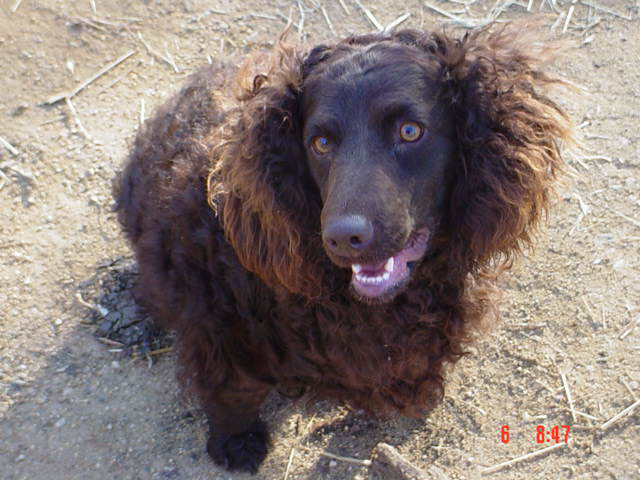

In [175]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
Image.open( "./dogImages/test/009.American_water_spaniel/American_water_spaniel_00655.jpg" ).show()


In [176]:
image_path = "./dogImages/test/009.American_water_spaniel/American_water_spaniel_00655.jpg" 


In [177]:
image = Image.open(image_path)
transform = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
        ])
preprocessed_image = transform(image).unsqueeze(0)
preprocessed_image = preprocessed_image.to("cpu")
response = predictor.predict(preprocessed_image)

pred = np.argmax(response, 1) + 1

actual = int(image_path.split('.')[1].split('/')[-1])
print(f"Actual: {actual}, Prediction: {pred[0]}")

Actual: 9, Prediction: 9


In [120]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

[05/14/25 11:58:41] INFO     Deleting endpoint configuration with name:                             ]8;id=302982;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=408136;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#4913\4913]8;;\
                             pytorch-inference-2025-05-14-11-48-27-876                                             

                    INFO     Deleting endpoint with name: pytorch-inference-2025-05-14-11-48-27-876 ]8;id=133740;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=201382;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#4903\4903]8;;\